In [2]:
''' Main '''
import numpy as np
import pandas as pd
import os, time, re
import pickle, gzip, datetime
from os import listdir, walk
from os.path import isfile, join

''' Data Visualization '''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl
from mpl_toolkits.axes_grid1 import Grid 

%matplotlib inline


''' Data Preperation and Module Evaluation'''
from sklearn import preprocessing as pp
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss, accuracy_score
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score, mean_squared_error
from keras.utils import to_categorical
from sklearn.metrics import adjusted_rand_score 
import random 

''' Algorithms '''
from kshape.core import kshape, zscore
import tslearn
from tslearn.utils import to_time_series_dataset
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import TimeSeriesKMeans
import hdbscan

''' tensorFlow and Keras '''
import tensorflow as tf
import keras
from keras import backend as K
from keras.models import Sequential, Model
from keras.layers import Activation, Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.layers import LeakyReLU, Reshape, UpSampling2D, Conv2DTranspose
from keras.layers import BatchNormalization, Input, Lambda
from keras.layers import Embedding, Flatten, dot
from keras import regularizers
from keras.losses import MeanSquaredError, BinaryCrossentropy
from keras.losses import MeanSquaredError

from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot
from keras.optimizers import Adam, RMSprop
from tensorflow.keras.datasets import mnist

In [19]:
# # Loading dataset
# current_path = os.getcwd()
# file = '/UCR_TS_Archive_2015/'
# data_train = np.loadtxt(current_path + file + "ECGFiveDays/ECGFiveDays_TRAIN", delimiter = ",")
# X_train = to_time_series_dataset(data_train[:, 1:])
# y_train = data_train[:, 0].astype(np.int)
# data_test = np.leadtxt(current_path + file + "ECGFiveDays/ECGFiveDays_TEST", delimiter = ",")
# X_test = to_time_series_dataset(data_test[:, 1:])
# y_test = data.test[:, 0].astype(np.int)

In [18]:
# Loading dataset
current_path = os.getcwd()
file = 'UCR_TS_Archive_2015'
train_path = os.path.join(current_path, file, "ECGFiveDays", "ECGFiveDays_TRAIN")
test_path = os.path.join(current_path, file, "ECGFiveDays", "ECGFiveDays_TEST")

# Load the training data
data_train = np.loadtxt(train_path, delimiter=",")
X_train = to_time_series_dataset(data_train[:, 1:])
y_train = data_train[:, 0].astype(int)

# Load the test data
data_test = np.loadtxt(test_path, delimiter=",")
X_test = to_time_series_dataset(data_test[:, 1:])
y_test = data_test[:, 0].astype(int)


In [22]:
print("Number of time series:", len(data_train))
print("Number of unique classes:", len(np.unique(data_train[:,0])))
print("Time series length:", len(data_train[0,1:]))

Number of time series: 23
Number of unique classes: 2
Time series length: 136


plot 0 Class 1.0


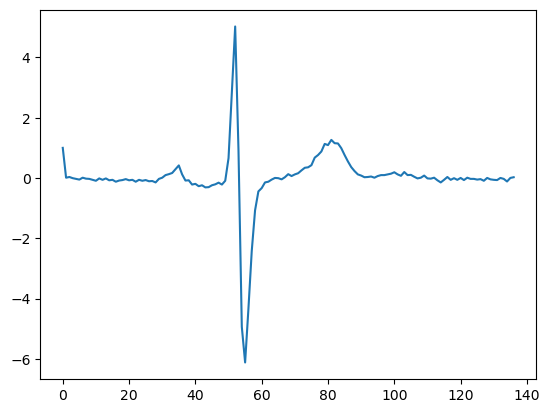

plot 1 Class 1.0


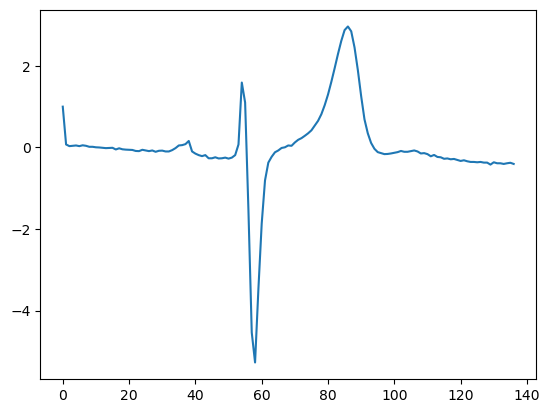

plot 4 Class 1.0


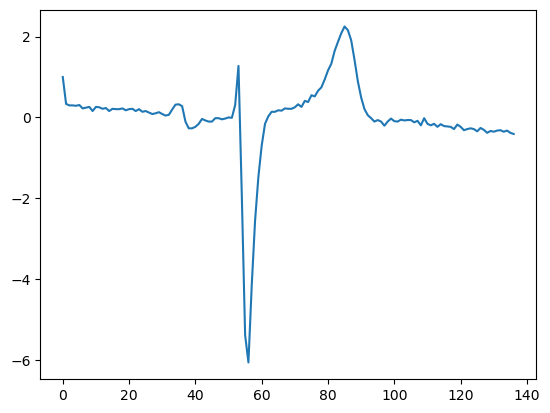

plot 7 Class 1.0


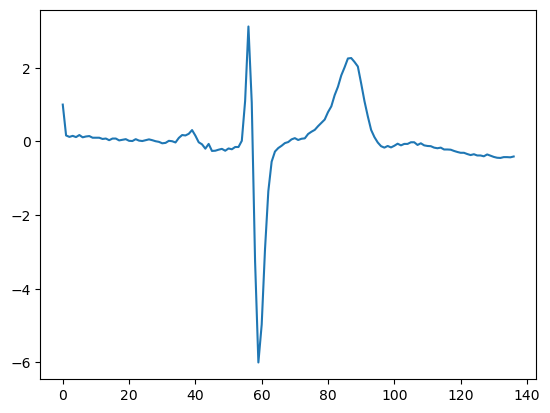

plot 9 Class 1.0


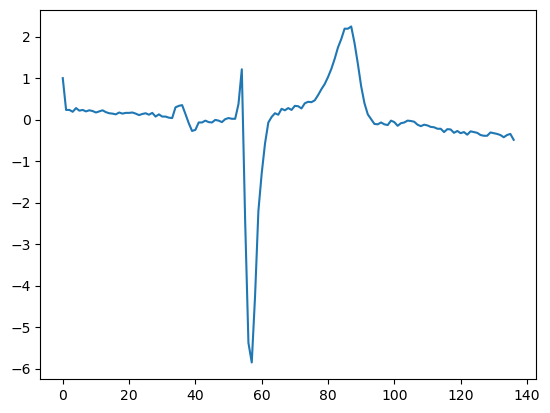

In [23]:
#Example of clas 1.0
for i in range (0,10):
    if data_train[i,0]==1.0:
        print("plot", i, "Class", data_train[i,0])
        plt.plot(data_train[i])
        plt.show()

plot 2 Class 2.0


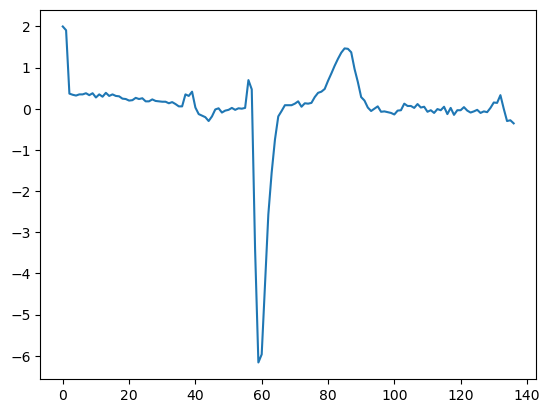

plot 3 Class 2.0


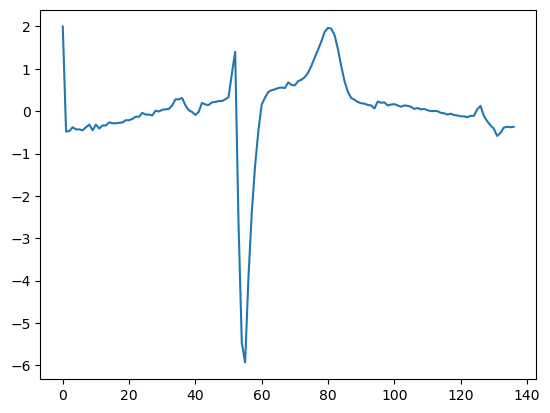

plot 5 Class 2.0


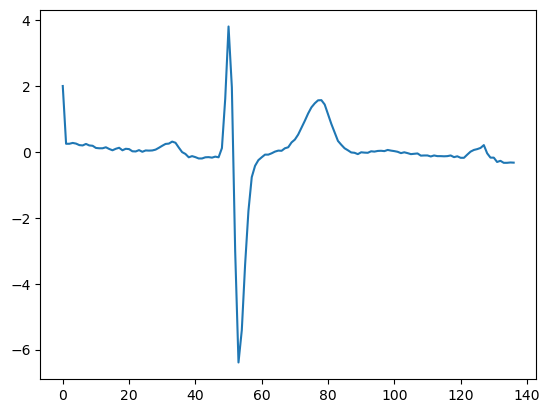

plot 6 Class 2.0


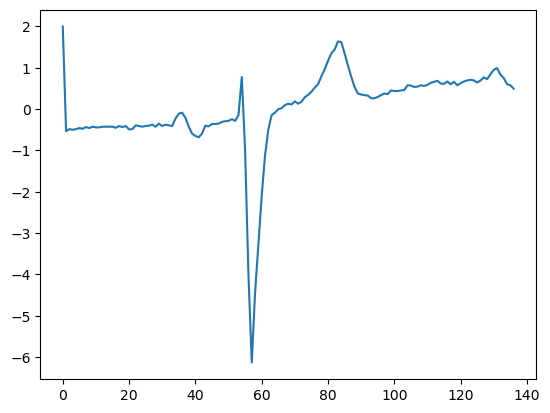

plot 8 Class 2.0


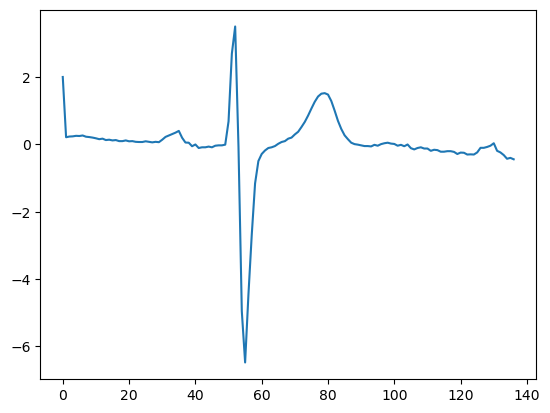

In [24]:
#Example of clas 2.0
for i in range (0,10):
    if data_train[i,0]==2.0:
        print("plot", i, "Class", data_train[i,0])
        plt.plot(data_train[i])
        plt.show()

In [25]:
#Data Preperation - Scale
X_train = TimeSeriesScalerMeanVariance(mu= 0., std = 1).fit_transform(X_train)
X_test = TimeSeriesScalerMeanVariance(mu= 0., std = 1).fit_transform(X_test)

In [28]:
from tslearn.clustering import KShape

In [29]:
# training using k-shape
ks= KShape(n_clusters=2, max_iter=100, n_init= 100, verbose=0)
ks.fit(X_train)

KShape(n_clusters=2, n_init=100, verbose=0)

In [31]:
#make predictions and calculate adjusted rand index
preds = ks.predict(X_train)
ars = adjusted_rand_score(data_train[:,0], preds)
print("Adjusted Rand Index", ars)

Adjusted Rand Index 0.668041237113402


In [33]:
#make predictions on test set and calculate adjusted rand index
preds_test = ks.predict(X_test)
ars = adjusted_rand_score(data_test[:,0], preds_test)
print("Adjusted Rand Index", ars)

Adjusted Rand Index 0.0015065064318688526
